In [1]:
import matlab.engine
eng = matlab.engine.start_matlab()
import matplotlib.pyplot as plt
import os
import cv2
import math as mt
import numpy as np

In [2]:
#path to the diffraction images collected in pump and probe fashion

main_path = r'D:\PhD Experimental data\Electron diffraction\Main ones\2020-02-18_PIRL\Diffraction_y5p0_z87p0\delay_10us'
folder_name = 'Backup for img#{}'
file_name_probe = 'frame {x} for img#{y} 2020-2-18 11x0.5sec Probe 15000{z:02}fs.spe'
file_name_pp = 'frame {x} for img#{y} 2020-2-18 11x0.5sec Pump+Probe 15000{z:02}fs.spe'

In [3]:
#reading the .spe files corresponding to pump and probe data and storing it as multidimensional array 
probe_data_tmp = []
pp_data_tmp = []
k=0
for i in range(1,6):
    folder_path = os.path.join(main_path,folder_name.format(i))
    
    print('Reading from folder {}'.format(i))
    print(folder_path)
    
    for j in range(1,6):
        #reading images
        probe_file = os.path.join(folder_path,file_name_probe.format(x=j,y=i,z=k))
        print(probe_file)
        pp_file = os.path.join(folder_path,file_name_pp.format(x=j,y=i,z=k))
        print(pp_file)
        #storing the images as numpy arrays 
        probe_data_tmp.append(np.array(eng.ReadsspeIndividual(probe_file),dtype=np.uint16))
        pp_data_tmp.append(np.array(eng.ReadsspeIndividual(pp_file),dtype=np.uint16))
    k=k+1

Reading from folder 1
D:\PhD Experimental data\Electron diffraction\Main ones\2020-02-18_PIRL\Diffraction_y5p0_z87p0\delay_10us\Backup for img#1
D:\PhD Experimental data\Electron diffraction\Main ones\2020-02-18_PIRL\Diffraction_y5p0_z87p0\delay_10us\Backup for img#1\frame 1 for img#1 2020-2-18 11x0.5sec Probe 1500000fs.spe
D:\PhD Experimental data\Electron diffraction\Main ones\2020-02-18_PIRL\Diffraction_y5p0_z87p0\delay_10us\Backup for img#1\frame 1 for img#1 2020-2-18 11x0.5sec Pump+Probe 1500000fs.spe
D:\PhD Experimental data\Electron diffraction\Main ones\2020-02-18_PIRL\Diffraction_y5p0_z87p0\delay_10us\Backup for img#1\frame 2 for img#1 2020-2-18 11x0.5sec Probe 1500000fs.spe
D:\PhD Experimental data\Electron diffraction\Main ones\2020-02-18_PIRL\Diffraction_y5p0_z87p0\delay_10us\Backup for img#1\frame 2 for img#1 2020-2-18 11x0.5sec Pump+Probe 1500000fs.spe
D:\PhD Experimental data\Electron diffraction\Main ones\2020-02-18_PIRL\Diffraction_y5p0_z87p0\delay_10us\Backup for img#

D:\PhD Experimental data\Electron diffraction\Main ones\2020-02-18_PIRL\Diffraction_y5p0_z87p0\delay_10us\Backup for img#5\frame 2 for img#5 2020-2-18 11x0.5sec Probe 1500004fs.spe
D:\PhD Experimental data\Electron diffraction\Main ones\2020-02-18_PIRL\Diffraction_y5p0_z87p0\delay_10us\Backup for img#5\frame 2 for img#5 2020-2-18 11x0.5sec Pump+Probe 1500004fs.spe
D:\PhD Experimental data\Electron diffraction\Main ones\2020-02-18_PIRL\Diffraction_y5p0_z87p0\delay_10us\Backup for img#5\frame 3 for img#5 2020-2-18 11x0.5sec Probe 1500004fs.spe
D:\PhD Experimental data\Electron diffraction\Main ones\2020-02-18_PIRL\Diffraction_y5p0_z87p0\delay_10us\Backup for img#5\frame 3 for img#5 2020-2-18 11x0.5sec Pump+Probe 1500004fs.spe
D:\PhD Experimental data\Electron diffraction\Main ones\2020-02-18_PIRL\Diffraction_y5p0_z87p0\delay_10us\Backup for img#5\frame 4 for img#5 2020-2-18 11x0.5sec Probe 1500004fs.spe
D:\PhD Experimental data\Electron diffraction\Main ones\2020-02-18_PIRL\Diffraction_y

In [4]:
np.shape(probe_data_tmp)

(25, 900, 900)

In [5]:
#Clean the data
#in each backup folders there are 5 shots which needs to be averaged and the arked files needs to be removed
median_pp =[]
median_probe=[]
mean_pp = []
mean_probe = []
for i in range(24):
    median_pp.append(np.median(pp_data_tmp[i]))
    median_probe.append(np.median(probe_data_tmp[i]))
    mean_pp.append(np.mean(pp_data_tmp[i]))
    mean_probe.append(np.mean(probe_data_tmp[i]))
print("Pump+probe meadian")
print(median_pp)
print('Probe median')
print(median_probe)
print("Pump+probe mean")
print(mean_pp)
print('Probe mean')
print(mean_probe)

Pump+probe meadian
[356.0, 356.0, 356.0, 356.0, 356.0, 357.0, 357.0, 357.0, 357.0, 357.0, 357.0, 357.0, 357.0, 357.0, 357.0, 357.0, 357.0, 357.0, 357.0, 357.0, 357.0, 357.0, 357.0, 356.0]
Probe median
[353.0, 353.0, 353.0, 353.0, 353.0, 354.0, 354.0, 354.0, 354.0, 354.0, 354.0, 354.0, 354.0, 354.0, 354.0, 354.0, 354.0, 354.0, 354.0, 354.0, 354.0, 354.0, 354.0, 354.0]
Pump+probe mean
[361.5232061728395, 361.47930617283953, 360.8553839506173, 361.1291703703704, 361.5569074074074, 361.60277654320987, 361.4759543209877, 361.9653074074074, 361.8851358024691, 361.313712345679, 362.10854197530864, 361.64994074074076, 361.4264444444444, 362.13323827160497, 361.7370888888889, 361.63516419753086, 361.8312851851852, 362.22346543209875, 362.20503333333335, 361.9568827160494, 362.47457901234566, 362.2211172839506, 361.8760827160494, 361.22893456790126]
Probe mean
[358.17504444444444, 357.6325716049383, 358.3702135802469, 358.3409049382716, 358.6748851851852, 358.47917037037035, 358.96706049382715, 

In [6]:
std_pp = np.std(median_pp)
avg_pp = np.average(median_pp)
std_prob = np.std(median_probe)
avg_prob = np.average(median_probe)

print('Average pump+probe pixel intensity = {}'.format(avg_pp))

Average pump+probe pixel intensity = 356.75


In [7]:
i=0
deleted_file_pp = []
deleted_file_prob = []

while i<len(pp_data_tmp):
    if np.median(pp_data_tmp[i]) > avg_pp+std_pp:
        deleted_file_pp.append(pp_data_tmp[i])
        pp_data_tmp.pop(i)
        #probe_data_tmp.pop(i)
    i=i+1

j=0
i=0
while j<len(probe_data_tmp):
    if np.median(probe_data_tmp[i]) > avg_pp+std_pp:
        deleted_file_prob.append(probe_data_tmp[i])
        probe_data_tmp.pop(i)
        #pp_data_tmp.pop(i)
    j=j+1

In [9]:
print('deleted pp file #{}'.format(len(deleted_file_pp)))
print('deleted probe file #{}'.format(len(deleted_file_prob)))
np.shape(deleted_file_pp)
#plt.imshow(deleted_file_pp[4])
#plt.colorbar()

deleted pp file #0
deleted probe file #0


(0,)

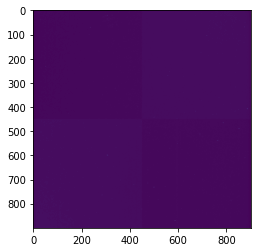

In [10]:
background_file = r'D:\PhD Experimental data\Electron diffraction\Main ones\2020-02-18_PIRL\BG\img#1 2020-2-18 11x0.5sec.spe'
bg = np.array(eng.ReadsspeIndividual(background_file),dtype=np.uint16)
plt.imshow(bg)

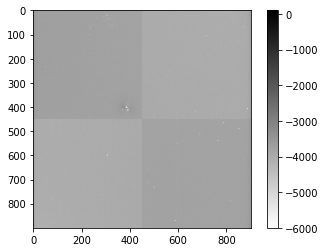

In [11]:
pp_probe = []

sum_pp = np.zeros([900,900])
for i in range(len(pp_data_tmp)):
    sum_pp = sum_pp+pp_data_tmp[i]
    
avg_pp_img = sum_pp/len(pp_data_tmp)

sum_probe = np.zeros([900,900])
for i in range(len(probe_data_tmp)):
    sum_probe = sum_probe+probe_data_tmp[i]
    
avg_pp_img = sum_pp/len(pp_data_tmp)
avg_probe_img = sum_probe/len(probe_data_tmp)

avg_pp_probe = avg_pp_img-avg_probe_img
avg_bg = np.subtract(avg_pp_probe, bg) 

plt.imshow(avg_bg, cmap = 'gray_r', vmin = -6000, vmax = 100)
plt.colorbar()

In [12]:
for i in range(len(pp_data_tmp)):
    pp_probe.append(abs(pp_data_tmp[i])-abs(probe_data_tmp[i]))
[l,x,y] = np.shape(pp_probe)
summ = np.zeros([x,y])
for i in pp_probe:
    summ = summ+i
avg = summ/len(pp_probe)

final = np.subtract(bg,avg)

new_folder = r'D:\PhD Experimental data\Electron diffraction\Analysis\18-02-2020'
file_name = '2020-02-18_306mW_10us.png'
path_new = os.path.join(new_folder,file_name)


#from sklearn.preprocessing import scale
#final = scale(final, axis=1, with_mean=True, with_std=True, copy=True )

final *= 255.0/final.max()

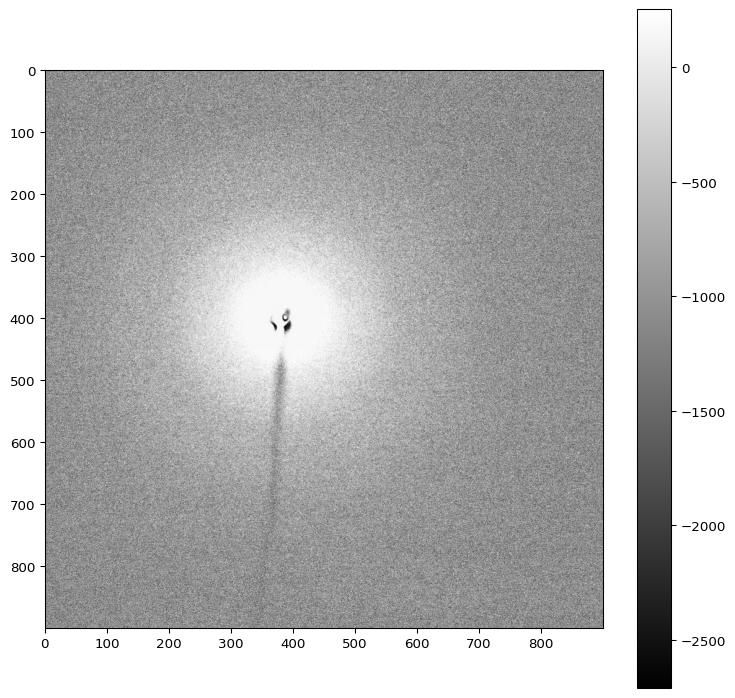

In [13]:
my_dpi = 96
plt.figure(figsize=(900/my_dpi, 900/my_dpi), dpi=my_dpi)
plt.imshow(final,cmap = 'gray')
plt.colorbar()
plt.imsave(fname = path_new,arr=final, cmap='gray', format='png')